<a href="https://colab.research.google.com/github/doeungim/ADP_DE/blob/main/ADP_Statistics_0422%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [26]:
from traitlets.config import Config
import nbformat
import nbconvert


def to_pdf(ipynb_path) :
    c = Config()
    my_preprocesors = [ExtractAttachmentsPreprocessor]
    c.PDFExporter.preprocessors = my_preprocesors
    c.LatexExporter.preprocessors = my_preprocesors

    exporter = nbconvert.PDFExporter(config=c, extra_loaders=[dl])
    writer = nbconvert.writers.FilesWriter()

    nb = nbformat.read(ipynb_path, as_version=4)

    (body, resources) = exporter.from_notebook_node(nb, resources=resources)
    writer.write(body, resources, "output.pdf")

## 모비율 검정
p를 6이 나오는 확률이라고 하자. 에 대하여
을 검정하기 위하여, 여러 개의 주사위를 던져 총 n=8000개의 관측치 중 1389개의 주사위 눈이 6인 결과를 얻었다. 유의수준 0.05 하에서 가설검정을 진행하라

In [27]:
p = 1/6 # 정해진 확률
n = 8000
p_hat = 1389 / 8000


se = np.sqrt(p * (1-p) / n)
z_stat = (p_hat - p) / se
print(z_stat)

## 기각역
from scipy.stats import norm

z_critical = norm.ppf(1 - 0.05)
print(z_critical) # 1.65 를 구하는 식

# P-value = 검정 통계량값의 누적 질량 함수
print(1 - norm.cdf(abs(z_stat)))

1.6700000000000026
1.6448536269514722
0.04745968180294702


한 지역의 국회의원 선거여론조사를 지난달 실시한 결과 특정후보의 지지율이 60%이었다. 최근에 지지율에 변동이 있는지 알아보기 위해 100명을 단순임의추출하였더니 55명이 지지를 하였다. 특정후보에 대한 현재 지지율이 60%에서 변동이 있는지 유의수준 5%로 가설검정하라.

- H0 : 특정 후보에 대한 지지율이 60&이다.
- H1 : 특정 후보에 대한 지지율이 60%이 아니다.

In [28]:
p = 0.6
n = 100
p_hat = 55 / 100

se = np.sqrt(p * (1- p) / n)
d = (p_hat - p)
z = d / se
print(z)

# 기각역 ppf 확률 분포 함수
z_critical = norm.ppf(1 - 0.05)

#  p_value
print(2 * (1 - norm.cdf(abs(z))))

-1.0206207261596563
0.30743416592739603


## 모비율 구간 추정
한 대학교에서 3월 한 달간 신입학생 325명을 대상으로 일주일에 1회 이하로 술을 마시는 사람을 조사해본 결과 25명이었다. 99% 신뢰수준에서 모비율을 추정하라.



/

In [29]:
n = 325
p = 25 / 325
conf = 0.01

# 표준오차
SE = np.sqrt(p * (1- p) / n)

# 기각역
conf_z = norm.ppf(1 - conf/2) #2.57
# 허용 오차 Za/2 * SE
ME = conf_z * SE

시중에서 판매되는 한 제품의 불량률을 추정하려고 한다. 900대의 제품을 랜덤하게 조사하였더니 불량률이 450대였다. 판매되는 제품되는 불량률에 대한 90% 신뢰구간을 구하여라.

In [30]:
n = 900
p = 450 / 900
conf = 0.1

# 1) SE
SE = np.sqrt(p * (1 -p) / n)

# 2) Z_crtical
conf = norm.ppf(1- conf/2)

# 3) ME
ME = conf * SE
print(p - ME, p + ME)


### Libary 풀이
from statsmodels.stats.proportion import proportion_confint
count = 450
nobs = 900

low, upper = proportion_confint(count, nobs, alpha = 0.1)
print(({low}, {upper}))

0.4725857728841421 0.5274142271158578
({0.4725857728841421}, {0.5274142271158578})


철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90% 신뢰수준, 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가 (ADP_26 기출)

In [31]:
conf = 0.1

Z = norm.ppf(1 - conf/2 ) # 1.644
p = 0.5
# 추정 오차 한계
E = 0.05

((Z**2 * p * (1 - p)) / E**2)

270.5543454095412

## 이표본 비율 검정

1. 특정 후보의 지지율이 "성별"에 따른 차이가 있는가?
2. 두 대의 기계의 불량률이 서로 다른가?

C사 생산 제품 1000개 중 양품이 600개, D사 생산 제품 500개 중 양품이 200개 이다. 두 회사의 양품률에 차이가 있는지 검정하여라.

- H1 : 두 회사의 양품율의 차이는 없다.
- H0 : 두 회사의 양품율의 차이는 있다.

In [32]:
## Solution 1)
n1 = 1000
p1 = 600 / 1000

n2 = 500
p2 = 200 / 500

# 차이
d = p1 - p2

# 기각역 (양측검정)
Z = norm.ppf(1 - 0.05/2)

# 합동 분산
pe = (n1 * p1 + n2 * p2) / (n1 + n2)

# SE
se = np.sqrt( (pe * (1 - pe)) / n1 + (pe * (1 - pe)) / n2)

# 검정통계량
z = d/se

# 유의 수준 : 검정 통계량의 확률 누적 함수
p_val = 1 - norm.cdf(np.abs(z))
print('{:.3f}'.format(Z, z))
print('{:.3f}'.format(p_val))

1.960
0.000


In [33]:
## Solution 2)
from scipy.stats import chi2_contingency
observed = [[600, 400], [200, 300]]

chi2, p_value, dof, expected = chi2_contingency(observed)
chi2, p_value, dof, expected

print(chi2)
print('p-value : {:.3f}'.format(p_value))

52.77087053571428
p-value : 0.000


금년도 대통령 선거에서 특정후보의 지지율에 대해 남녀별로 독립적으로 표본을 추출해 조사하였더니 남자 225명 중 54명이 지지를 하였고, 여자 175명 중 52명이 지지를 하였다. 남녀의 지지율에 차이가 있다고 할 수 있는지 유의수준 5％에서 검정

- H0 : 남녀 지지율 차이가 없다
- H1 : 남녀 지지율 차이가 있다.

In [34]:
observed = [[54, 161], [52, 120]]

chi, p, d, ex = chi2_contingency(observed)
print(chi)
print(p)

print('귀무가설 기각' if p > 0.05 else '귀무가설채택')

1.0135915362922163
0.3140439528983863
귀무가설 기각


In [35]:
n1 = 161
p1 = 54 / 161

n2 = 52
p2 = 52 / 120

alpha = 0.05

# 차이
d = p1 - p2

# 합동분산
pe = (p1 * n1 + p2 * n2) / (n1 + n2)
SE = np.sqrt((pe * (1 - pe)) / n1  + (pe * (1 - pe)) / n2)

z = d/SE

# 기각역
z_critical = norm.ppf(1 - alpha / 2)

# 유의 수준
p_val = 1 - norm.cdf(np.abs(z))

print(z, p_val)
print('귀무가설 기각' if p > 0.05 else '귀무가설채택')

-1.2796164522064672 0.10034003040536987
귀무가설 기각


공구를 생산하는 어느 공장은 주간 생산조와 야간 생산조를 운영하고 있다.
과 를 각각 주간 생산조와 야간 생산조가 생산한 공구의 불량률이라고하자. 각 생산조에 의해 생산된 공구를 무작위로 1000개씩 뽑아서  대를 검정하려고 한다. 주간 생산 공구와 야간 생산 공구로부터 각각
개의 불량품들이 관측되었다. 유의수준 0.05하에서 가설을 검정



In [36]:
n1 = 1000
p1 = 37 / 1000

n2 = 1000
p2 = 53/ 1000

alpha = 0.05

# 차이
d = p1 - p2

# PE
pe = (n1 * p1 + n2 * p2) / (n1 + n2)
SE = np.sqrt((pe * (1 -pe)) /n1 + (pe * (1 -pe)) /n2)

z = d/ SE

# 기각역
z_critical = norm.ppf(1 - alpha/ 2)

pm과 pf 를 각각 어느 새의 수컷과 암컷이 그들이 부화한 장소로 돌아오는 비율을 나타낸다고 하자. 894마리 수컷 중 124마리가 돌아왔고, 700마리 암컷 중 70마리가 돌아왔을 때 두 비율 차이에 대한 95% 신뢰구간을 구하여라.

In [37]:
p1 = 124 / 894
n1 = 894

n2 = 700
p2 =  70 / 700

from scipy.stats import norm
# diff
d = p1 - p2

# conf
conf_z = norm.ppf(1 - 0.05 / 2)

# PE
se = np.sqrt(p1 * (1- p1)/ n1 + p2 * (1- p2)/ n2)
se2 = np.sqrt(p1 * (1 - p1)/n1 + p2 * (1 - p2)/n2)
# Z 통계량
z = d / se

# 오차 한계
me = conf_z * se

# 신뢰구간
print(d- me, d + me)


0.006965556033592134 0.07043936566663159


## 분산분석

- 1. 정규성 : 각 Y는 정규분포를 따른다.
HO : 데이터가 정규분포이다. </br>
H1 : 데이터가 정규분포가 아니다. </br>

        from scipy.stats import shapiro </br>
        s, p = shapiro(data1) # 각 데이터에 대해 실행

- 2. 등분산성

        from scipy.stats import levene </br>
        levene(data1, data2) </br>
        - 그룹 내 오차의 분포를 정규 분포로 가정하지 않음

        from scipy.stats import bartlett </br>
        s, p = bartlett(data1, data2) </br>
        - 그룹 내 오차의 분포를 정규 분포로 가정한다.
        
        
- 3. 독립성
  일반적으로 수집된 관찰값은 독립적으로 수집되었다고 보기 때문에, 독립성 검정 따로 진행 하지 않음

### 1. 정규, 등분, 샘플 사이즈 (o)
 분산분석 : standard ANOVA </br>
 사후검정 : Tukey HDS, snk, Dunnett, Duncan, REGWQ, REGWF </br>

###  2. 정규, 등분 , 샘플 사이즈 (x)
 분산 부석: standard ANOVA </br>
 사후 검정 : Fhisher LSD, Scheffe, Dunnett, Tukey HDS, Bonferrioni, sidak </br>

###  3. 정규성, 등분(x)
 분산 분석 : Welchis ANOVA, Bron-Forsyth ANOVA </br>
 사후 검정 : GamesHowell, Dunnet Td, Dunnett C, Tanhane T2 </br>

일원 배치 분산분석은 집단을 나타내는 변수의 인자가 1개인 경우의 완전확률화계획법

- H0 : 집단 간 모평균에는 차이가 없다
- H1 : 집단 간 모평균은 같다고 할 수 있다.

In [38]:
from statsmodels.stats.oneway import anova_oneway
df= pd.DataFrame({"A0" : [76,80,78,79,83,74],
                  "A1" : [82,75,83,78,85,80],
                  "A2" : [79,87,88,86,84,82],
                  "A3" : [81,74,76,78,73,70]})

## 1) 정규성 ok, 등분산성 X = Welch
print("Welch`s one-way ANOVA")
welch = anova_oneway(data = df.melt()['value'],
                     groups = df.melt()['variable'],
                     use_var = 'unequal')

print(welch.statistic, welch.pvalue)

## 2) 등분산성 X - Brown-Forsythe one-way ANOVA

brown = anova_oneway(data = df.melt()['value'],
                     groups = df.melt()['variable'],
                     use_var = 'bf')

print("Brown-Forsythe ANOVA")
print(brown.statistic, brown.pvalue)

## 3) 사후검정 (정규성 O, 등분산성 X - GamesHowell)

from pingouin import pairwise_gameshowell
org_data = df.melt()

pairwise_gameshowell(dv = 'value', between = 'variable', data = org_data)

Welch`s one-way ANOVA
6.01934099553306 0.010985900770272991
Brown-Forsythe ANOVA
6.952861952861953 0.0023541804034572164


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,A0,A1,78.333333,80.500000,-2.166667,1.956471,-1.107436,9.805651,0.693488,-0.590196
1,A0,A2,78.333333,84.333333,-6.000000,1.885618,-3.181981,9.944065,0.041365,-1.695801
2,A0,A3,78.333333,75.333333,3.000000,2.038518,1.471657,9.583173,0.488889,0.784303
3,A1,A2,80.500000,84.333333,-3.833333,2.023473,-1.894432,9.955991,0.289721,-1.009616
4,A1,A3,80.500000,75.333333,5.166667,2.166667,2.384615,9.951485,0.143511,1.270854
5,A2,A3,84.333333,75.333333,9.000000,2.102908,4.279788,9.819241,0.007620,2.280865


In [39]:
!pip install pingouin

## One Way ANOVA

5종류의 수면제 A, B, C, D, E 가 있다. 수면제를 복용한 후 졸음을 느끼기 시작한 시간을 관찰하였다. 다음의 자료에 근거하여 수면제 사이에 졸음을 느끼는 시간이 다르다고 할 수 있는가를 알아보자.

![image.png](attachment:3e88f242-9e23-4c3d-8427-961b51d7df7c.png)

## f_oneway - from scipy.stats as stats

In [40]:
import numpy as np
import scipy.stats as stats

# 각 수면제별 관찰된 졸음 시간 데이터
a = np.array([9, 10, 15, 14, 13])
b = np.array([11, 16, 12, 18, 18])
c = np.array([13, 18, 18, 19, 19])
d = np.array([18, 20, 22, 19, 23])
e = np.array([17, 12, 13, 15, 11])

f, p_val = stats.f_oneway(a,b,c,d,e)
alpha = 0.5

print(f, p_val)


7.721407624633434 0.0006219339482425209


## ols - from statsmodel.formula.api import ols

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

a = np.array([9, 10, 15, 14, 13])
b = np.array([11, 16, 12, 18, 18])
c = np.array([13, 18, 18, 19, 19])
d = np.array([18, 20, 22, 19, 23])
e = np.array([17, 12, 13, 15, 11])

aa = pd.DataFrame({'Value': a , 'Group' : "A"})
bb = pd.DataFrame({'Value': b , 'Group' : "B"})
cc = pd.DataFrame({'Value': c , 'Group' : "C"})
dd = pd.DataFrame({'Value': d , 'Group' : "D"})
ee = pd.DataFrame({'Value': e , 'Group' : "E"})

df = pd.concat([aa, bb, cc, dd, ee], axis = 0)
print(df.columns)

model = ols('Value ~ Group', data= df).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

Index(['Value', 'Group'], dtype='object')


,df,sum_sq,mean_sq,F,PR(>F)
Group,4.0,210.64,52.66,7.721408,0.000622
Residual,20.0,136.40,6.82,NaN,NaN


## from statsmodels.stats.oneway import anova_oneway

In [42]:
from statsmodels.stats.oneway import anova_oneway

df= pd.DataFrame({"A0" : [76,80,78,79,83,74],
                  "A1" : [82,75,83,78,85,80],
                  "A2" : [79,87,88,86,84,82],
                  "A3" : [81,74,76,78,73,70]})

print(df.head(3))

os = anova_oneway(df.melt()['value'],
                  df.melt()['variable'],
                  use_var = 'equal')

print(os.statistic, os.pvalue)

   A0  A1  A2  A3
0  76  82  79  81
1  80  75  87  74
2  78  83  88  76
6.952861952861953 0.002175486114794491


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    A0     A1   2.1667  0.713   -3.518  7.8513  False
    A0     A2      6.0 0.0363   0.3153 11.6847   True
    A0     A3     -3.0  0.469  -8.6847  2.6847  False
    A1     A2   3.8333 0.2647  -1.8513   9.518  False
    A1     A3  -5.1667 0.0831 -10.8513   0.518  False
    A2     A3     -9.0 0.0014 -14.6847 -3.3153   True
-----------------------------------------------------


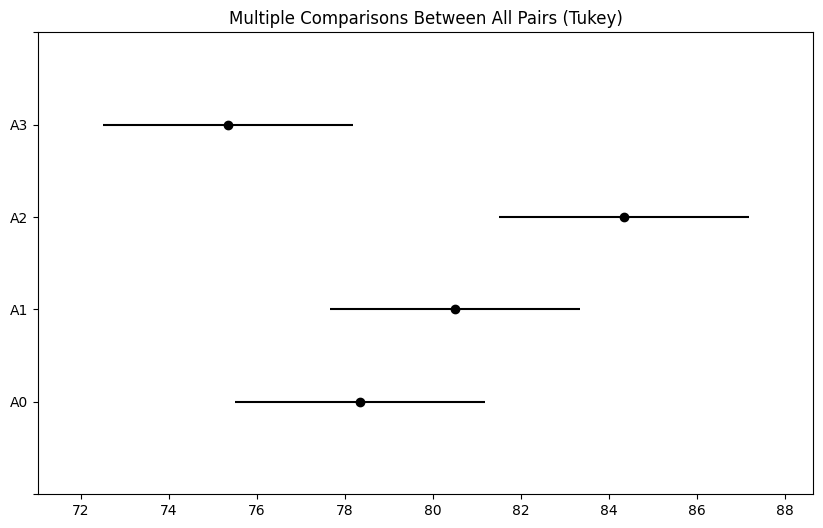

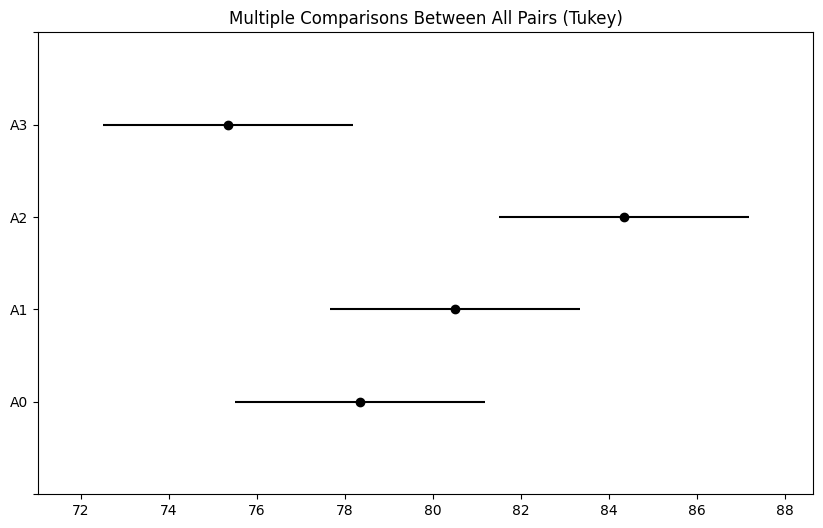

In [43]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(df.melt()['value'], df.melt()['variable'])
print(tukey)

tukey.plot_simultaneous()

### ADP 29
아래 데이터는 a,b,c,d 네 차종 각각 5회 실험 시 범퍼 파손 정도이다. (단, 각 모집단은 정규분포를 따르며 모집단 간 등분산성을 가정한다.)

각 차종 별 범퍼 파손의 정도에 차이가 유의한지 검정하라.
귀무가설을 채택한다면 그 의미를 해석하고, 귀무가설을 기각하였다면 사후분석을 시행하라.

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv')
df.head()

,name,ratio
0,A,10.993428
1,A,9.723471
2,A,11.295377
3,A,13.046060
4,A,9.531693


            df      sum_sq    mean_sq          F    PR(>F)
name       3.0  236.534027  78.844676  24.976953  0.000003
Residual  16.0   50.507154   3.156697        NaN       NaN
검정통계량 :24.977 , P-value :0.000 
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   5.3934  0.001   2.1785  8.6083   True
     A      C  -4.2156 0.0085  -7.4305 -1.0007   True
     A      D  -0.7086 0.9207  -3.9235  2.5063  False
     B      C   -9.609    0.0 -12.8239 -6.3941   True
     B      D   -6.102 0.0003  -9.3169 -2.8871   True
     C      D    3.507 0.0302   0.2921  6.7219   True
-----------------------------------------------------


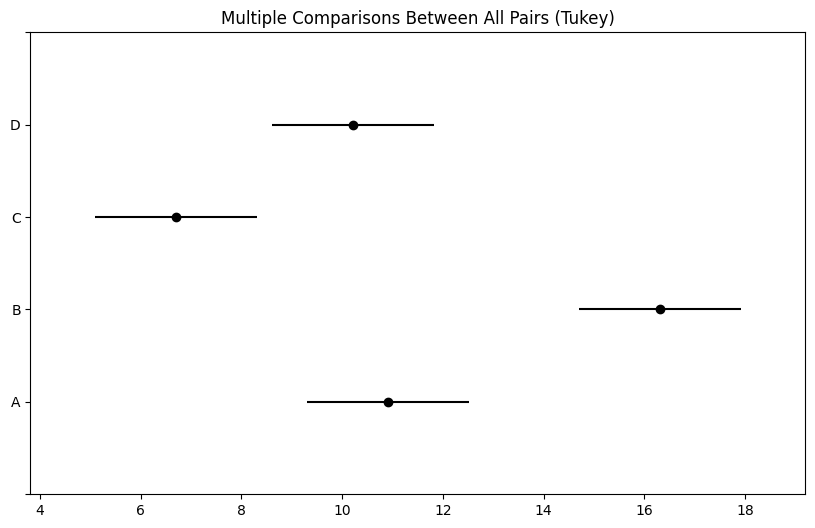

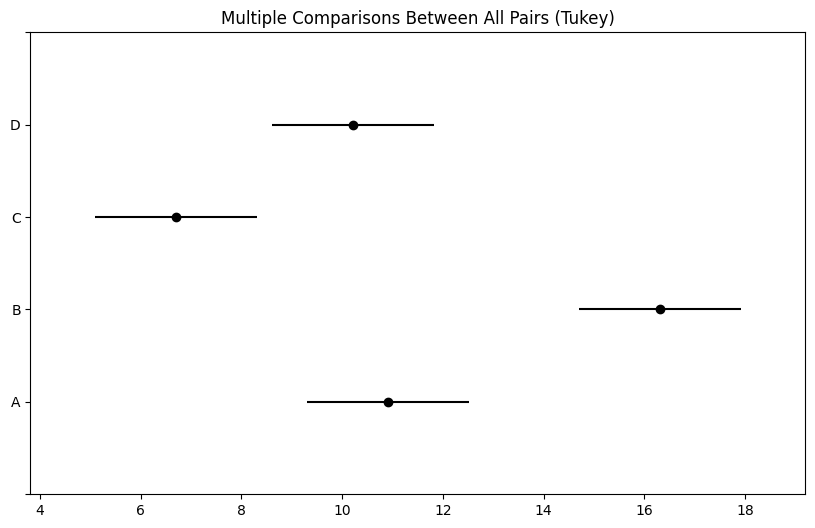

In [45]:
m = ols('ratio ~  name', data =df).fit()
t = sm.stats.anova_lm(m)
print(t)

t2 = anova_oneway(data = df.ratio,
                  groups = df.name,
                  use_var = "equal")

print("검정통계량 :{:.3f} , P-value :{:.3f} ".format(t2.statistic, t2.pvalue))

pos = pairwise_tukeyhsd(df.ratio, df.name)
print(pos)

pos.plot_simultaneous()

## Two way ANOVA
- 인자의 수가 2개 이상인 분산분석
  : 인자- 모수 인자 (Fixed), 변량인자 (Random Factor)

- Fixed + Fixed 조합 데이더 수가 1개 이면 반복이 없는 이원배치, 2개이면 이원배치 분산분석

- Fixed + RandomFactor : 난괴법, 확률화블럭계획법

 HO : 변수A에 따른 Y값에는 차이가 없고, 변수 B에 따른 Y값에도 차이가 없으며, A-B의 상호 작용 효과가 없다.

 H1 : 변수A에 따른 Y값에는 차이가 있거나, 변수 B에 따른 Y값에도 차이가 있거나, A-B의 상호 작용 효과가 있다.

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


# 예시. C() : 범주형(factor) 변수로 취급하며, 이를 컬럼으로 변환
formula = 'AveragePrice ~ C(avocado_type) * C(region)'
model = ols(formula, avocado).fit()

In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/chainhaus/pythoncourse/master/avocado.csv')

df = df[["AveragePrice","type","region"]]

df = df[(df['region']=='Orlando') |\
                  (df['region']=='Boston' )|\
                  (df['region']=='Chicago')].reset_index(drop=True)
df.head(2)

,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston


### 1. 교호 작용에 대한 가설
 Ho : 종류와 지역간의 교호작용 효과는 없다. </br>
 H1 : 종류와 지역간의 교호작용 효과는 있다.

### 2. 주효과에 대한 가설
 Ho : 지역에 따른 가격 차이는 없다. </br>
 H1 : 지역에 따른 가격 차이는 있다.


 Ho : 종류에 따른 가격 차이는 없다.</br>
 H1 : 종에 따른 가격 차이는 있다

                      sum_sq      df           F         PR(>F)
C(type)            56.111007     1.0  828.218296  1.989417e-133
C(region)           0.432136     2.0    3.189242   4.161918e-02
C(type):C(region)   1.878817     2.0   13.866003   1.146622e-06
Residual           68.291047  1008.0         NaN            NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.50 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
 Boston Chicago   0.0259 0.6073 -0.0046 0.0564  False
 Boston Orlando  -0.0247 0.6356 -0.0552 0.0059  False
Chicago Orlando  -0.0506  0.151 -0.0811  -0.02   True
-----------------------------------------------------


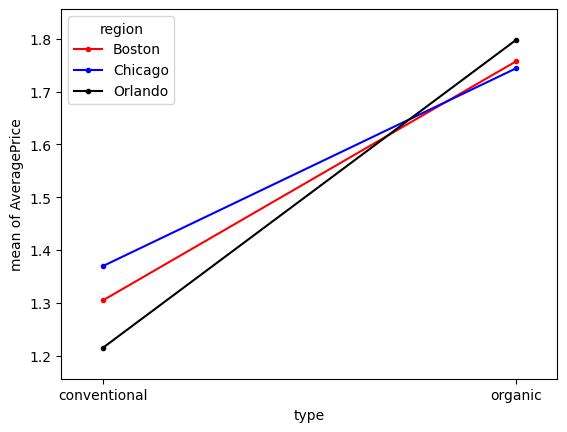

In [47]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = "AveragePrice ~ C(type) * C(region)"
model = ols(formula ,  df).fit()
t = anova_lm(model, typ = 2)

print(t)

from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt


fig = interaction_plot(df.type,
                       df.region,
                       df.AveragePrice, colors = ['red', 'blue', 'black'] )

## 다중 비교
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mu = MultiComparison(data = df['AveragePrice'], groups = df['region'])
tukey = mu.tukeyhsd(alpha = 0.5)
print(tukey)

네 가지 종류의 비료와 세 가지 벼품종에 대한 쌀 수확량을 조사하기 위하여 한 농업 시험장에서 각 수준에 대한 3회 반복 실험을 한 자료가 표 9.14와 같다

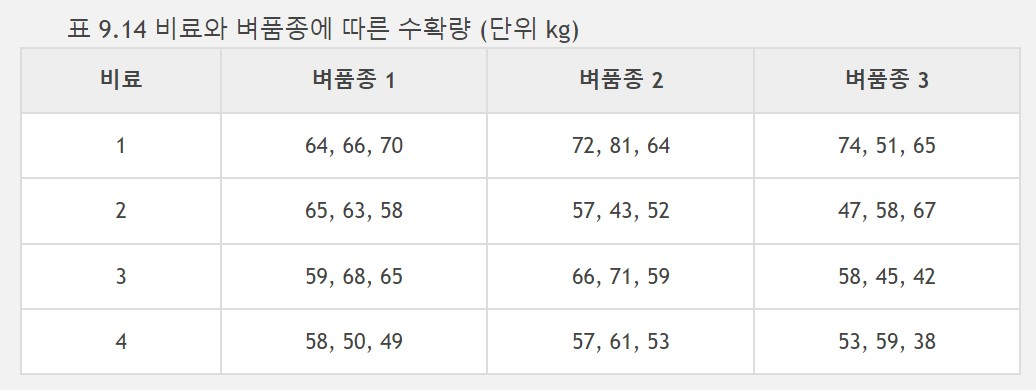

- 비료와 벼의 각 수준별 조합에 대한 수확량 평균을 구하라.
- 비료와 벼품종의 주효과를 검정하고 두 인자의 교호작용에 대하여 검정하라.
- 이원분산분석 검정 결과를 확인하라-

In [48]:
df = pd.DataFrame({
          '품종1': [[64,66,70] , [65,63,58], [59,68,65] ,[58,50,49]] ,
          '품종2': [[72,81,64] , [57,43,52], [66,71,59] ,[57,61,53]] ,
          '품종3': [[74,51,65] , [47,58,67], [58,45,42] ,[53,59,38]]
 })

data = {
   '비료' : [] ,
   '벼품종' : [],
   '수확량' : []  }

for 비료_idx, 벼품종_value in enumerate(df.values):
  for 벼품종, 수확량_list in enumerate(벼품종_value, start = 1):
    for 수확량 in 수확량_list :
      data['비료'].append(비료_idx + 1)
      data['벼품종'].append(벼품종)
      data['수확량'].append(수확량)

new_df = pd.DataFrame(data)
print(new_df.head(3))

   비료  벼품종  수확량
0   1    1   64
1   1    1   66
2   1    1   70


                df       sum_sq     mean_sq         F    PR(>F)
C(비료)          3.0  1002.888889  334.296296  6.017333  0.003307
C(벼품종)         2.0   342.388889  171.194444  3.081500  0.064393
C(비료):C(벼품종)   6.0   588.944444   98.157407  1.766833  0.148795
Residual      24.0  1333.333333   55.555556       NaN       NaN


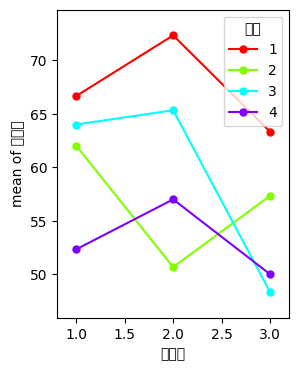

In [49]:
import warnings
warnings.filterwarnings('ignore')


formula = "수확량 ~ C(비료) * C(벼품종)"
model = ols(formula, new_df).fit()
print(anova_lm(model))

fig, ax = plt.subplots(figsize = (3,4))
fig = interaction_plot(new_df['벼품종'],
                       new_df['비료'],
                       new_df['수확량'],
                       ms = 10,
                       ax= ax)
# 주효과
## 귀무 가설 : 네 비표의 평균 수확량은 같다.
## 귀무 가설 : 3가지의 벼 품종의 평균 수확량은 같다.

## 교호작용
# 귀무 가설 : 벼품종과 비료 사이에는 상호작용이 없다.

## **Type III ANOVA : 비균형 설계 자료**


In [50]:
df_poison = pd.read_csv("https://raw.githubusercontent.com/guru99-edu/R-Programming/master/poisons.csv", index_col=0)

df_poison = df_poison.iloc[1:,:].reset_index(drop=True)  # 데이터의 첫 행을 제거

df = df_poison.copy()

print(df.head(3))
print(df.treat.value_counts())

   time  poison treat
0  0.45       1     A
1  0.46       1     A
2  0.43       1     A
treat
B    12
C    12
D    12
A    11
Name: count, dtype: int64


In [51]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols("time ~ C(poison) * C(treat)", data = df).fit()
anova_lm(model, typ = 3)

## 불균형자료일 떄, typ =3

,sum_sq,df,F,PR(>F)
Intercept,0.598533,1.0,26.627969,0.000010
C(poison),0.096206,2.0,2.140041,0.132793
C(treat),0.367098,3.0,5.443909,0.003525
C(poison):C(treat),0.241006,6.0,1.787011,0.130406
Residual,0.786717,35.0,NaN,NaN


##** ADP 27**

지하철 호선과 월별, 승객 수 간 상관관계가 있는 지 확인 (Type III Anova 사용)

- 귀무가설과 대립가설을 설정하라
- 검정통계량과 유의확률을 구하고, 대립가설 채택여부를 기술하라 (반올림하여 소수점 아래 둘째자리까지 표기하시오)

line
1    24
2    24
3    24
Name: count, dtype: int64
month
1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    6
11    6
12    6
Name: count, dtype: int64
                    df        sum_sq       mean_sq             F        PR(>F)
C(line)            2.0  2.147444e+06  1.073722e+06  10362.998525  2.007247e-50
C(month)          11.0  3.206533e+04  2.915030e+03     28.134341  2.103496e-14
C(line):C(month)  22.0  9.696908e+04  4.407686e+03     42.540665  1.582232e-19
Residual          36.0  3.730000e+03  1.036111e+02           NaN           NaN


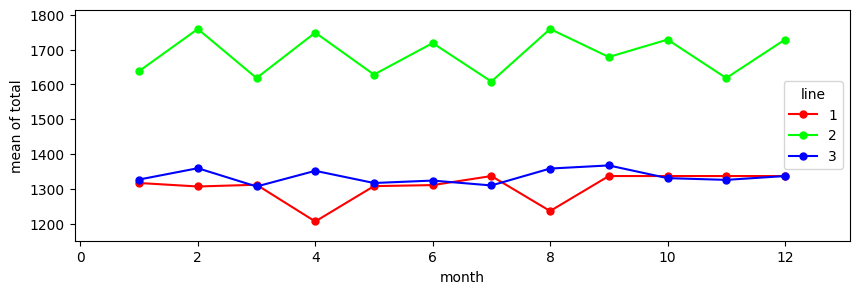

In [52]:
import pandas as pd
df = pd.read_csv('https://github.com/johyunkang/adp_certificate/files/10883822/subway.csv')
df.head()

# 귀무 가설 : 지하철 월별 , 승객 수간 상관관계는 없다.
# 대립 가설 : 지하철 월별 , 승객 수간 상관관계는 있다.

## 주효과
# HO : 월별 승객 수의 차이는 없다.
# HO : 지하철별 승객수의 차이는 없다.

print(df['line'].value_counts())
print(df['month'].value_counts())

## 각 요인의 Level이 같다.

formula = "total ~ C(line) * C(month)"
model = ols(formula, data = df).fit()
print(anova_lm(model))

## interaction_plot

fig, ax = plt.subplots(figsize = (10,3))
fig = interaction_plot(df['month'],
                       df['line'],
                       df['total'],
                       ms = 10,
                       ax = ax)

## **등분산인 Two-way ANOVA**

In [53]:
## 반복이 없는 이원배치 분산 분석 - 반복이 없음으로 교호작용 효과는 검출 할 수 없다.

data = pd.DataFrame({"A":[1,2,3,1,2,3,1,2,3,1,2,3],
                 "B":[1,1,1,2,2,2,3,3,3,4,4,4],
                 "Y": [4,3,5,5,7,6,7,8,9,8,10,12]})

print(data.head())

model = ols("Y~C(A)+C(B)", data = data).fit()
anova_lm(model)

   A  B  Y
0  1  1  4
1  2  1  3
2  3  1  5
3  1  2  5
4  2  2  7


,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,8.0,4.0,4.0,0.078717
C(B),3.0,60.0,20.0,20.0,0.001586
Residual,6.0,6.0,1.0,NaN,NaN


In [54]:
## 반복이 있는이원배치 분산 분석
# A, B 모두 인자
from pandas import DataFrame, crosstab
data = DataFrame(
    {"A":[1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3],#열수준
     "B":[1,1,1,1,1,1,1,1,1, 2,2,2,2,2,2,2,2,2, 3,3,3,3,3,3,3,3,3, 4,4,4,4,4,4,4,4,4],#행수준
  "Y":[64,66,70,72,81,64,74,51,65, 65,63,58,57,43,52,47,58,67, 59,68,65,66,71,59,58,45,42, 58,50,49,57,61,53,53,59,38]})

print("[라이브러리 검정]")
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols("Y~C(A)+C(B)+C(A):C(B)", data = data).fit()
atable3 = anova_lm(model)
print(atable3)

[라이브러리 검정]
             df       sum_sq     mean_sq         F    PR(>F)
C(A)        2.0   342.388889  171.194444  3.081500  0.064393
C(B)        3.0  1002.888889  334.296296  6.017333  0.003307
C(A):C(B)   6.0   588.944444   98.157407  1.766833  0.148795
Residual   24.0  1333.333333   55.555556       NaN       NaN


In [55]:
## A : 모수 인자, B 변량인자

from pandas import DataFrame, crosstab
data = DataFrame({"A":[1,2,3,1,2,3,1,2,3,1,2,3],
                 "B":[1,1,1,2,2,2,3,3,3,4,4,4],
                 "Y": [4,3,5,5,7,6,7,8,9,8,10,12]})

print("[라이브러리 검정]")
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols("Y~C(A)+C(B)", data = data).fit()
atable2 = anova_lm(model)
print(atable2)
## 모수인자 A는 주효과 검정 결과 유의하지 않고,
## 변량인자 B는 주효과 검정 대신 모분산을 추정한다.

[라이브러리 검정]
           df  sum_sq  mean_sq     F    PR(>F)
C(A)      2.0     8.0      4.0   4.0  0.078717
C(B)      3.0    60.0     20.0  20.0  0.001586
Residual  6.0     6.0      1.0   NaN       NaN


## **Type 에 따른 ANOVA 분석 방법**

Type I  
- 변수를 하나씩 모델에 추가하는 방식
- 이미 추가된 변수와의 상호작용은 고려하지 않음
- **변수의 순서**가 중요한 경우

In [56]:
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
df.head(3)

f =  "mpg ~ cyl * gear"

model = ols(f, data = df).fit()
t = anova_lm(model, typ = 1)
print(t)

# Formula 의 순서에 영향을 받음

f1 = "mpg ~ gear + cyl"
model = ols(f1, data = df).fit()
t2 = anova_lm(model, typ = 1)
print(t2)

            df      sum_sq     mean_sq          F        PR(>F)
cyl        1.0  817.712952  817.712952  79.971086  1.068172e-09
gear       1.0    5.431287    5.431287   0.531172  4.721671e-01
cyl:gear   1.0   16.599939   16.599939   1.623449  2.130859e-01
Residual  28.0  286.303009   10.225107        NaN           NaN
            df      sum_sq     mean_sq          F        PR(>F)
gear       1.0  259.749188  259.749188  24.868449  2.631233e-05
cyl        1.0  563.395052  563.395052  53.939576  4.324142e-08
Residual  29.0  302.902948   10.444929        NaN           NaN


Type 2  
- 변수를 추가할 때 이미 추가된 변수와의 상호작용을 고려
- 부분 효과를 측정하며, 다른 변수들의 존재 여부와 관계 없이 각 변수의 독립적인 영향을 평가
- 변수의 순서는 중요하지 않음

In [57]:
model1 = ols('mpg ~ cyl * gear', data=df).fit()
anova_lm(model1,typ=2)

,sum_sq,df,F,PR(>F)
cyl,563.395052,1.0,55.099181,4.390162e-08
gear,5.431287,1.0,0.531172,4.721671e-01
cyl:gear,16.599939,1.0,1.623449,2.130859e-01
Residual,286.303009,28.0,NaN,NaN


Type III
- 카데고리별로 데이터 값이 비균형 설계되었을 떄
- 변수를 추가할때, 이미 추가된 변수와의 상호작용 및 다른 변수들의 존재 여부를 모두 고려
- 변수간 상호작용이 있는 경우, 올바른 결과를 제공

In [58]:
model1 = ols('mpg ~ cyl * gear', data=df).fit()
anova_lm(model1, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,14.180591,1.0,1.386840,0.248852
cyl,0.078590,1.0,0.007686,0.930763
gear,20.454957,1.0,2.000464,0.168275
cyl:gear,16.599939,1.0,1.623449,0.213086
Residual,286.303009,28.0,NaN,NaN


##**5장 : 추정과 가설 검정 연습 문제**
1) 모평균에 대한 95% 신뢰구간을 구하시오.
다음 데이터의 모표준 편차가 3이라는 것을 알고 있을 때, 모평균에 대한 95% 신뢰수준의 신뢰구간을 구하시오






In [59]:
from scipy.stats import t, norm

data = [10,19,15,11,13,14,18]

x = np.mean(data)
std = np.std(data)
n = len(data)
df= n-1
confa = 0.05

# 모분산을 모르는 경우 T 통계량

t_critical = t.ppf(1 - confa / 2 , df)

SE = std / np.sqrt(n)

ME = t_critical * SE

print(x - ME, x + ME)


## 모분산을 아는 경우 Z 통계량
sigma = 3

# Z_critical
z_critical = norm.ppf(1- confa/2)

SE2 = sigma / np.sqrt(n)

ME2 = z_critical * SE2
print(x - ME2, x + ME2)


11.415315330703809 17.156113240724764
12.063324022113047 16.508104549315526


2) 어느 제조회사의 불량률이 5%로 알려져 있다면, 95% 신뢰수준에서 오차의 한계가 3%가 되도록 하는 최소 표본의 사이즈는?

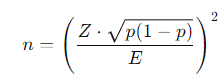



In [60]:
p = 0.05
ME = 0.03
confa = 0.05

conf_z = norm.ppf(1 - confa/2)

n = conf_z **2 * p * ( 1- p) / ME**2
print(round(n,3))

202.744


3) 임의로 추출한 표본 30개의 분산을 계산 했더니 50일 떄, 신뢰도 95% 모분산의 신뢰구간을 추정하시.

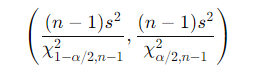

모평균을 모르는 경우, 표본 정보로 모분산의 신뢰구간을 구하는 문제

In [61]:
n = 30
df = n -1
v = 50
confa = 0.05

from scipy.stats import chi2

c1 = chi2.ppf(1 - confa/ 2, df)
c2 = chi2.ppf(confa/2, df)


cr1 = df * v / c1
cr2 = df * v / c2

4. 어느 뽑기 기계에서 20번 뽑기를 했더니 그 중 5개는 미니카였다. 해당 뽑기 기계에 있는 장난감들 중 미니카 비율을 p라고 하면 모비율 P에 대한 95% 신뢰구간을 구하시오.

    표본비율로 모비율의 신뢰구간을 구하는 문제

In [62]:
n = 20
p = 5/ 20
confa =  0.05

# conf_z
conf_z = norm.ppf(1 - confa/2)

# SE
se = np.sqrt(p * (1 - p)/ n)

# ME
ME = conf_z * se

print(p- ME, p + ME)

0.060227303217750994 0.439772696782249


5.